In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import numpy as np

In [ ]:
df = pd.read_excel('../GC_MS_data/hemp-gcms-original-transpose.xlsx')
df

,Type1,"(2R,4R)-2,4 imethyl-1-heptanol","(3b,24Z)-Stigmasta-5,24(28)-dien-3-ol","(3methyl,24R)-ergost-5-en-3-ol",(E)-24-Propylidenecholesterol,1-Docosanol,1-Octadecanol,"2-(6-Isopropenyl-3-methyl-2-cyclohexen-1-yl)-5-pentyl-1,3-benzenediol","2-Isopropyl-5-methyl-6-oxabicyclo[3,1,0]hexane-1-carbaldehyde",2-Monoolein,...,Stearic acid,"Stearic acid, ethyl ester",Stigmasterol,Tetrahydrocannabivarin (THCV),THC (Dronabino)l,Trilinolein,Triterpenoid,Tyramine,Vitamin E,Vitamin E succinate (calcium)
0,1,0.00,0.00,3.78,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.20,3.36,0.00,2.40,0.00,0.00,12.63
1,1,0.00,0.00,0.00,0.00,0.00,1.39,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3.92,0.00,0.00,0.00,0.00,0.00,1.45,0.00,0.00
3,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,2,0.00,5.95,7.61,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.41,0.00,0.00,0.00,1.66,0.00,1.25,14.16
7,2,1.23,0.00,0.00,1.73,1.06,1.17,0.00,1.83,2.53,...,1.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,2,0.00,0.00,0.00,0.00,0.00,0.00,1.04,0.00,0.00,...,0.00,2.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,2,0.00,4.30,5.28,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.45,5.62,18.20,0.00,2.18,0.00,0.00,15.10


In [3]:
column_name = df.columns
column_name

Index(['Type1', '(2R,4R)-2,4 imethyl-1-heptanol',
       '(3b,24Z)-Stigmasta-5,24(28)-dien-3-ol',
       '(3methyl,24R)-ergost-5-en-3-ol', '(E)-24-Propylidenecholesterol',
       '1-Docosanol', '1-Octadecanol',
       '2-(6-Isopropenyl-3-methyl-2-cyclohexen-1-yl)-5-pentyl-1,3-benzenediol',
       '2-Isopropyl-5-methyl-6-oxabicyclo[3,1,0]hexane-1-carbaldehyde',
       '2-Monoolein', '2-Pentylfuran', '2,4-Di-tert-butylphenol',
       '2,3(Z)-ethylcholestanol',
       '3-Amino-2-methyl-3-(4-methylphenyl)-1-phenyl-1-propanol',
       '4H-Pyran-4-one, 2,3-dihydro-3,5-dihydroxy-6- methyl-',
       '5-Pentyl-2(5H)-furanone', '7-Ethyl-4-nonanone',
       '9-Octadecenoic acid, (2-phenyl-1,3-dioxolan-4- yl) methyl ester, cis-',
       'Benzoic acid, 4-ethoxy-, ethyl ester', 'Campesterol',
       'Cannabidiol (CBD)', 'Cannabinol (CBN)', 'Clionasterol', 'Crocetane',
       'Cycloartenol', 'Decadienal, (2E,4E)-2,4-',
       'Gluco-octonic acid lactone', 'Glycerin', 'glycerol, 2-Palmitoyl',
       '

In [4]:
df_type=df['Type1']
df_type

0     1
1     1
2     1
3     1
4     1
5     1
6     2
7     2
8     2
9     2
10    2
11    2
Name: Type1, dtype: int64

In [5]:
df_features = df.drop('Type1', axis=1)
df_features

,"(2R,4R)-2,4 imethyl-1-heptanol","(3b,24Z)-Stigmasta-5,24(28)-dien-3-ol","(3methyl,24R)-ergost-5-en-3-ol",(E)-24-Propylidenecholesterol,1-Docosanol,1-Octadecanol,"2-(6-Isopropenyl-3-methyl-2-cyclohexen-1-yl)-5-pentyl-1,3-benzenediol","2-Isopropyl-5-methyl-6-oxabicyclo[3,1,0]hexane-1-carbaldehyde",2-Monoolein,2-Pentylfuran,...,Stearic acid,"Stearic acid, ethyl ester",Stigmasterol,Tetrahydrocannabivarin (THCV),THC (Dronabino)l,Trilinolein,Triterpenoid,Tyramine,Vitamin E,Vitamin E succinate (calcium)
0,0.00,0.00,3.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.20,3.36,0.00,2.40,0.00,0.00,12.63
1,0.00,0.00,0.00,0.00,0.00,1.39,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3.92,0.00,0.00,0.00,0.00,0.00,1.45,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,5.95,7.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.41,0.00,0.00,0.00,1.66,0.00,1.25,14.16
7,1.23,0.00,0.00,1.73,1.06,1.17,0.00,1.83,2.53,1.58,...,1.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,1.04,0.00,0.00,0.00,...,0.00,2.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,4.30,5.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.45,5.62,18.20,0.00,2.18,0.00,0.00,15.10


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)
scaled_data

array([[-0.30151134, -0.52738661,  0.94431323, -0.30151134, -0.42545243,
        -0.56941159, -0.30151134, -0.30151134, -0.30151134, -0.30151134,
        -0.30151134, -0.30151134, -0.30151134, -0.30151134, -0.30151134,
        -0.42298357, -0.30151134, -0.57584825, -0.55414623, -0.22788212,
         2.94058818,  0.74721752, -0.30151134,  0.95196148, -0.44570055,
        -0.30151134, -0.30151134, -0.30151134, -0.42398833, -0.30151134,
        -0.30151134,  0.4374522 , -0.30151134, -0.18401941, -0.68720363,
        -0.53756823, -0.30151134, -0.30151134, -0.55662427, -0.30151134,
        -0.30151134, -0.43514387, -0.43447484, -0.44471607,  3.31662479,
        -0.30151134,  3.14483027, -0.45009122, -0.72393674, -0.30151134,
         0.95199282, -0.30151134, -0.55859074, -0.44716112,  0.19326536,
         0.20461893, -0.30151134,  2.05705202, -0.30151134, -0.30151134,
         1.50236195],
       [-0.30151134, -0.52738661, -0.54868252, -0.30151134, -0.42545243,
         1.67592773, -0.30151

In [7]:
pca = PCA(n_components=2)

In [8]:
pca_result = pca.fit_transform(scaled_data)

In [9]:
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [10]:
df_pca['Hemp type'] = df_type
df_pca

,PC1,PC2,Hemp type
0,2.901986,0.383211,1
1,-1.537931,1.421478,1
2,-2.315611,-3.655380,1
3,-0.648374,-1.162741,1
4,-0.845485,-0.806060,1
5,-2.471578,-4.139611,1
6,6.682909,1.451987,2
7,-6.528469,7.834310,2
8,-2.580565,-4.737606,2
9,6.202964,1.342246,2


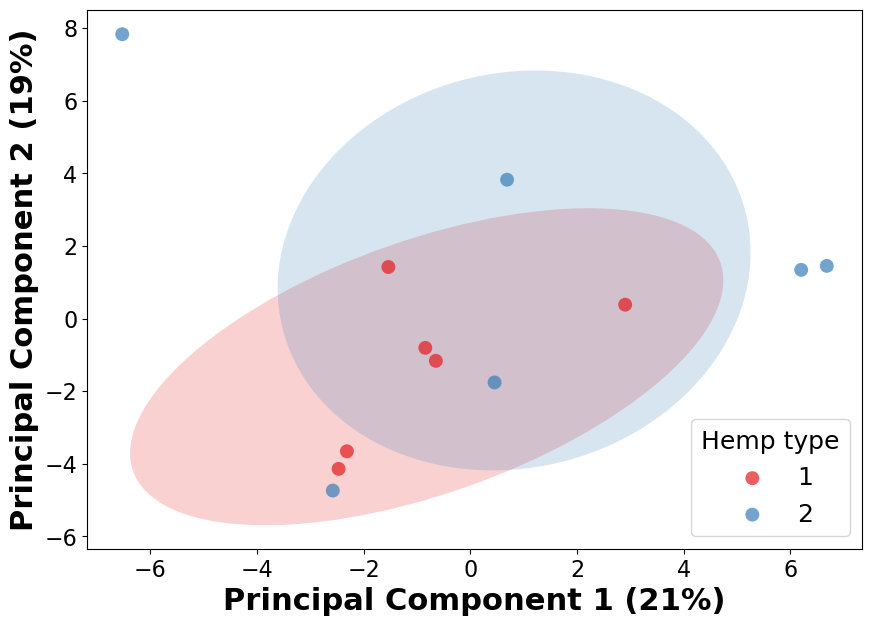

In [11]:
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=2, **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    The ellipse is centered at the mean of *x* and *y*.
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((np.mean(x), np.mean(y)),
                      width=ell_radius_x * n_std * 5,
                      height=ell_radius_y * n_std * 5,
                      angle=np.rad2deg(np.arctan2(*cov[:, 0][::-1])),
                      facecolor=color, alpha=0.2,
                      **kwargs)

    ax.add_patch(ellipse)

figure = plt.figure(figsize=(10, 7))
axis = figure.add_subplot(111)

colors = sns.color_palette("Set1", len(df_pca['Hemp type'].unique()))

labels = df_pca['Hemp type'].unique()

for label in labels:
    color = np.expand_dims(np.array(colors[label - 1]), axis=0)
    axis.scatter(df_pca[df_pca['Hemp type'] == label]['PC1'],
                 df_pca[df_pca['Hemp type'] == label]['PC2'],
                 c=color, alpha=0.7, label=label, edgecolor='none', s=100)
    

for label in labels:
    color = colors[label - 1]  # Get the color for the ellipse
    confidence_ellipse(df_pca[df_pca['Hemp type'] == label]['PC1'],
                       df_pca[df_pca['Hemp type'] == label]['PC2'],
                       axis, edgecolor=color, linewidth=0, zorder=0)



plt.xlabel('Principal Component 1 (21%)', fontsize=22, fontweight='bold')
plt.ylabel('Principal Component 2 (19%)', fontsize=22, fontweight='bold')
plt.legend(title='Hemp type', fontsize=18, title_fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
#plt.savefig('rev-figS3-clustermap-all-pca.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)


print("Explained Variance Ratio for each Principal Component:")
print(explained_variance_ratio)

print("\nCumulative Explained Variance Ratio:")
print(cumulative_variance)

Explained Variance Ratio for each Principal Component:
[0.21378205 0.19143601]

Cumulative Explained Variance Ratio:
[0.21378205 0.40521805]


In [13]:
loadings = pca.components_.T  # Transpose for easier readability
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=df_features.columns)

print("PCA Loadings:")
print(loadings_df)

PCA Loadings:
                                            PC1       PC2
(2R,4R)-2,4 imethyl-1-heptanol        -0.150943  0.202279
(3b,24Z)-Stigmasta-5,24(28)-dien-3-ol  0.222595  0.081936
(3methyl,24R)-ergost-5-en-3-ol         0.238712  0.055203
(E)-24-Propylidenecholesterol         -0.150943  0.202279
1-Docosanol                           -0.060480  0.190831
...                                         ...       ...
Trilinolein                            0.015891  0.098796
Triterpenoid                           0.220815  0.048849
Tyramine                              -0.053539 -0.094381
Vitamin E                              0.154514  0.037490
Vitamin E succinate (calcium)          0.239468  0.059053

[61 rows x 2 columns]


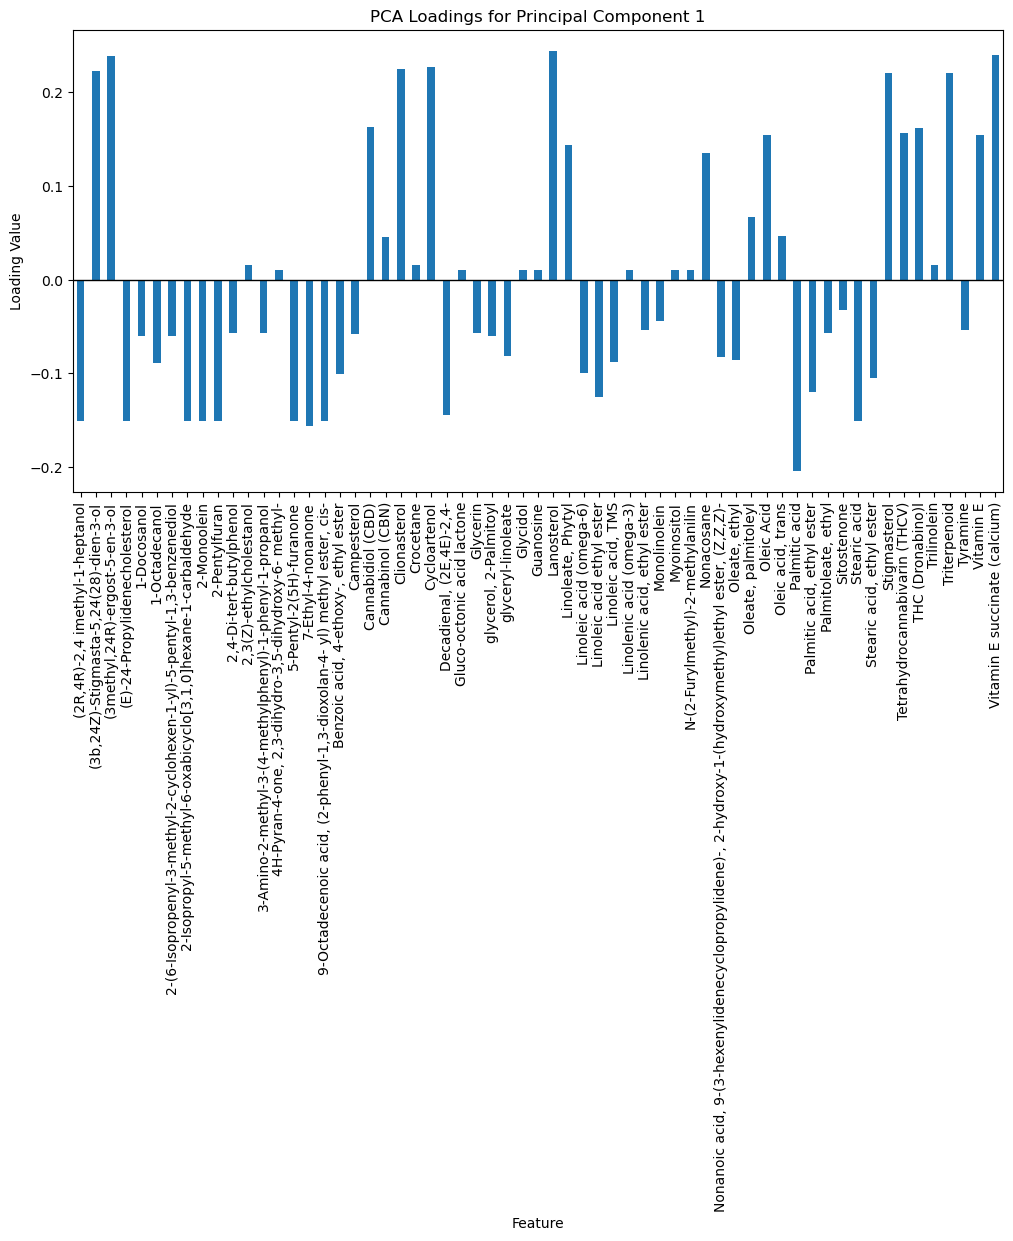

In [14]:
plt.figure(figsize=(12, 6))
loadings_df['PC1'].plot(kind='bar')
plt.title('PCA Loadings for Principal Component 1')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.grid(False)
#plt.savefig('clustermap-all-pca-loading1.png', dpi=300, bbox_inches='tight')
plt.show()

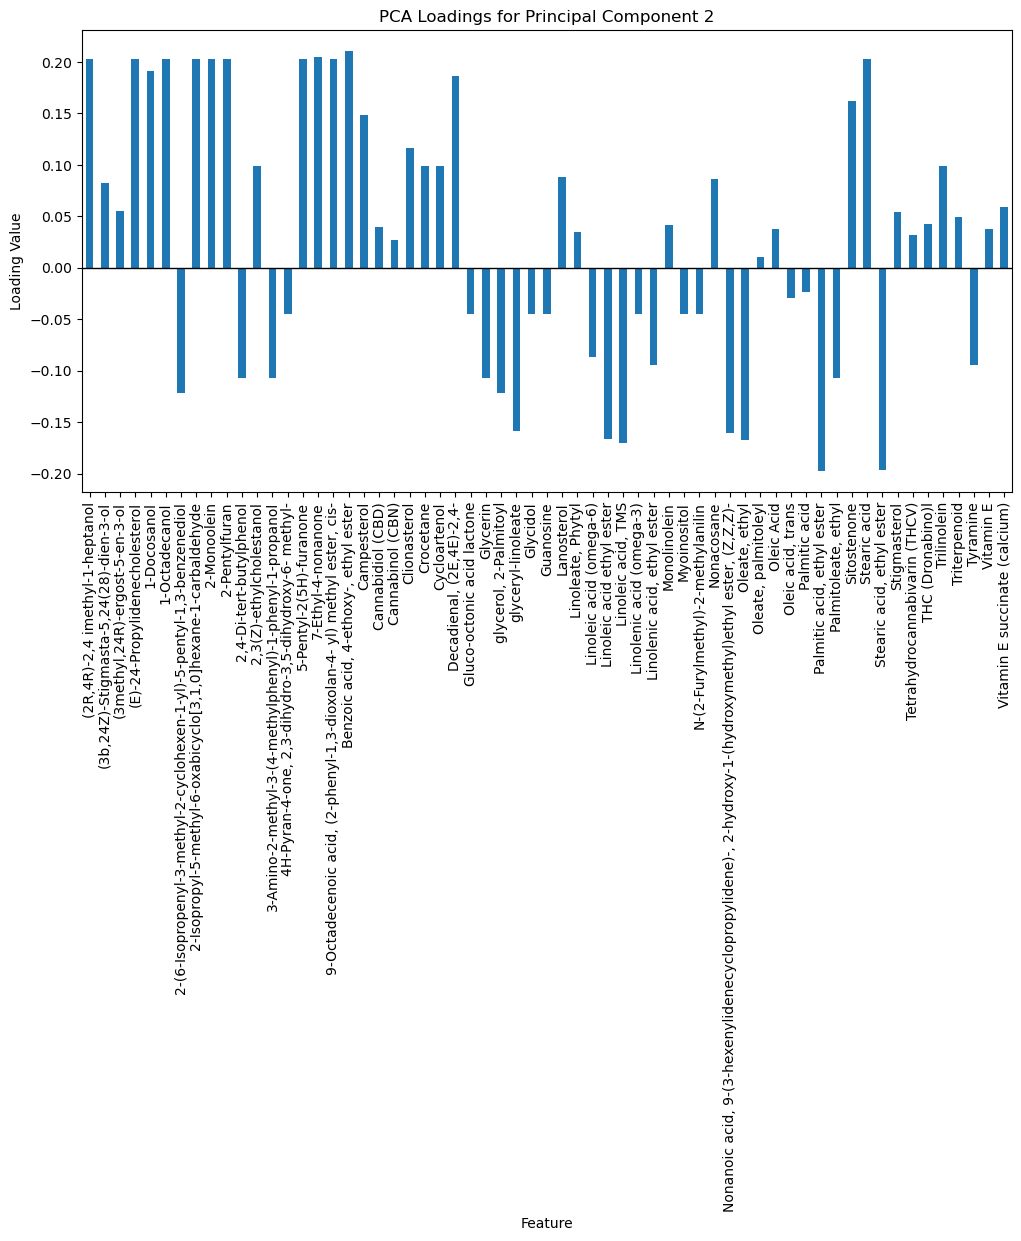

In [15]:
plt.figure(figsize=(12, 6))
loadings_df['PC2'].plot(kind='bar')
plt.title('PCA Loadings for Principal Component 2')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.grid(False)
#plt.savefig('clustermap-all-pca-loading2.png', dpi=300, bbox_inches='tight')
plt.show()